In [ ]:
!pip install tensorflow

In [ ]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
#
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch


In [ ]:
# Might need to run if not connected to the google drive

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path="/gdrive/MyDrive/Colab Notebooks/Reseach Spring 2024/rough-sfd-ml/roughsims/07-Jun-2019_Run1, Seed_19/Results/"
# path="/gdrive/MyDrive/Colab Notebooks/Reseach Spring 2024/rough-sfd-ml/roughsims/07-Jun-2019_Run1, Seed_20/Results/"



In [ ]:
# Domain Parameters
# If 'a.txt' contains a single value or structured data, adjust the loading method accordingly
a_data = pd.read_csv(path+'a.txt', sep=',', header=None)

# Simulation Parameters
t_data = pd.read_csv(path+'t.txt', sep=',', header=None)
hdot_data = pd.read_csv(path+'hdot.txt', sep=',', header=None)
hdotdot_data = pd.read_csv(path+'hdotdot.txt', sep=',', header=None)

# Mesh Grid Data
TRIANGLES_data = pd.read_csv(path+'TRIANGLES.txt', sep=',', header=None, dtype=int)
X_data = pd.read_csv(path+'X.txt', sep=',', header=None)
Y_data = pd.read_csv(path+'Y.txt', sep=',', header=None)
Z_data = pd.read_csv(path+'Z.txt', sep=',', header=None)
NODES_data = pd.read_csv(path+'NODES.txt', sep=',', header=None)

# Fluid Properties and Initial/Boundary Conditions
h_data = pd.read_csv(path+'h.txt', sep=',', header=None)
Pressure_data = pd.read_csv(path+'Pressure.txt', sep=',', header=None)
Fsd_data = pd.read_csv(path+'Fsd.txt', sep=',', header=None)

# # Assuming you've converted surf.fig to surf.png and placed it in the same directory:
# img = plt.imread(path+'../surf.png')
# plt.imshow(img)
# plt.show()


In [ ]:
# Fsd_data.size
# Fsd_data.shape
# type(Fsd_data)
# Fsd_data.head()

In [ ]:
# # Numpy arrays
# t_data_array = t_data.values
# Fsd_data_array = Fsd_data.values
# Z_data_array = Z_data.values # 51, 51

# # Fsd_data_array.size
# # Fsd_data_array.shape
# # type(Fsd_data_array)

In [ ]:
# # Flatten the arrays to ensure they are 1-dimensional
# t_data_array_flat = t_data_array.flatten() # 601
# Fsd_data_array_flat = Fsd_data_array.flatten() # 601
# Z_data_array_flat = Z_data_array.flatten() # 2601

In [ ]:
# Z_data
# t_data
# Fsd_data
df = pd.concat([t_data, Fsd_data])
df

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,0.0000,0.0050,0.0100,0.0150,0.0200,0.0250,0.0300,0.0350,0.0400,0.0450,...,2.9550,2.9600,2.9650,2.9700,2.9750,2.9800,2.985,2.9900,2.9950,3.0000
0,4.1258,4.0149,3.9034,3.7913,3.6789,3.5664,3.4541,3.3421,3.2305,3.1195,...,5.0383,4.9488,4.8554,4.7585,4.6585,4.5559,4.451,4.3441,4.2356,4.1258


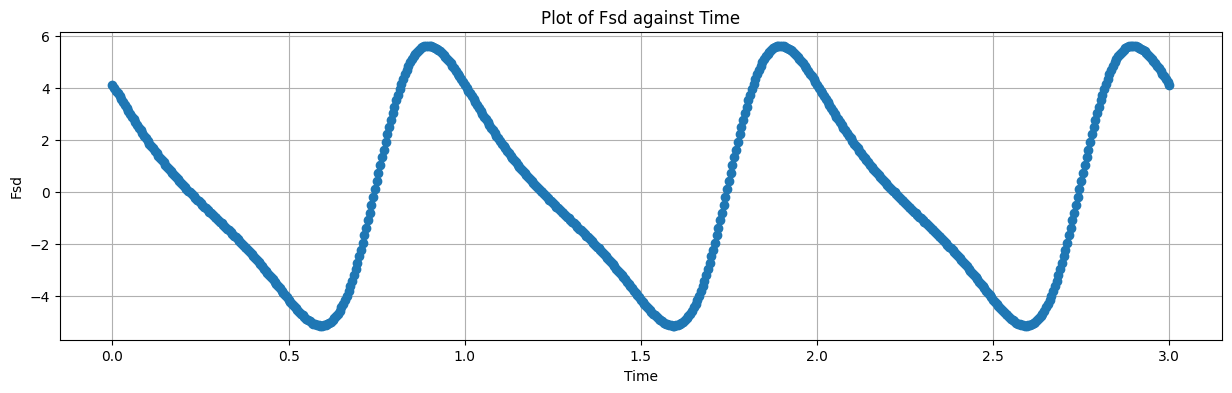

In [ ]:
# Extract row 1 and row 2 from the dataframe
row1 = df.iloc[0]  # Row 1
row2 = df.iloc[1]  # Row 2

plt.figure(figsize=(15, 4))
plt.plot(row1, row2, marker='o')
# plt.plot(row1, row2)
plt.xlabel('Time')
plt.ylabel('Fsd')
plt.title('Plot of Fsd against Time')
plt.grid(True)
plt.show()

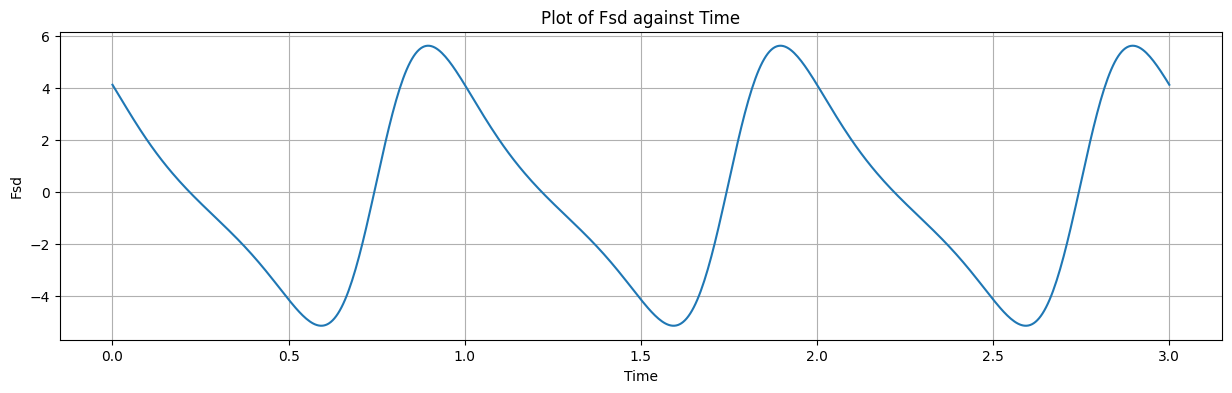

In [ ]:
# Extract row 1 and row 2 from the dataframe
row1 = df.iloc[0]  # Row 1
row2 = df.iloc[1]  # Row 2

plt.figure(figsize=(15, 4))
# plt.plot(row1, row2, marker='o')
plt.plot(row1, row2)
plt.xlabel('Time')
plt.ylabel('Fsd')
plt.title('Plot of Fsd against Time')
plt.grid(True)
plt.show()

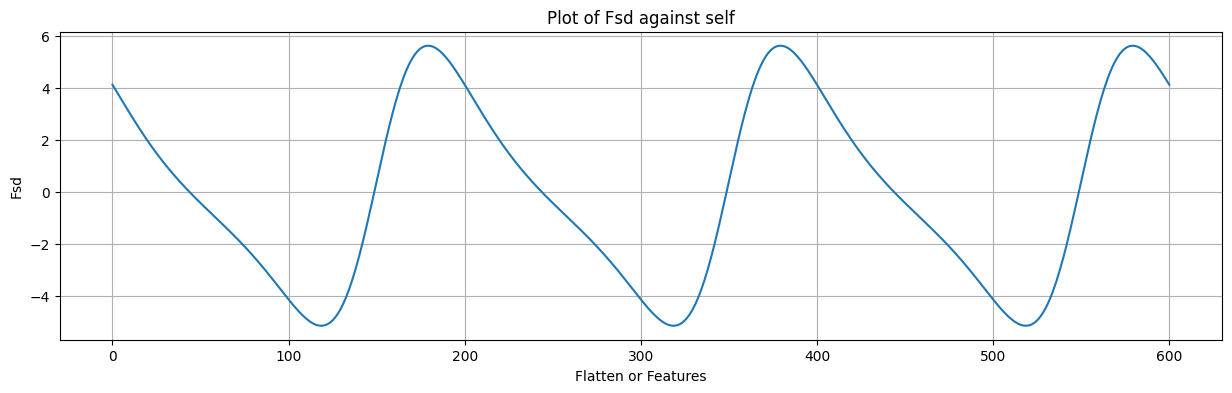

In [ ]:
row2 = df.iloc[1]  # Row 1

plt.figure(figsize=(15, 4))
plt.plot(row2)
plt.xlabel('Flatten or Features')
plt.ylabel('Fsd')
plt.title('Plot of Fsd against self')
plt.grid(True)
plt.show()

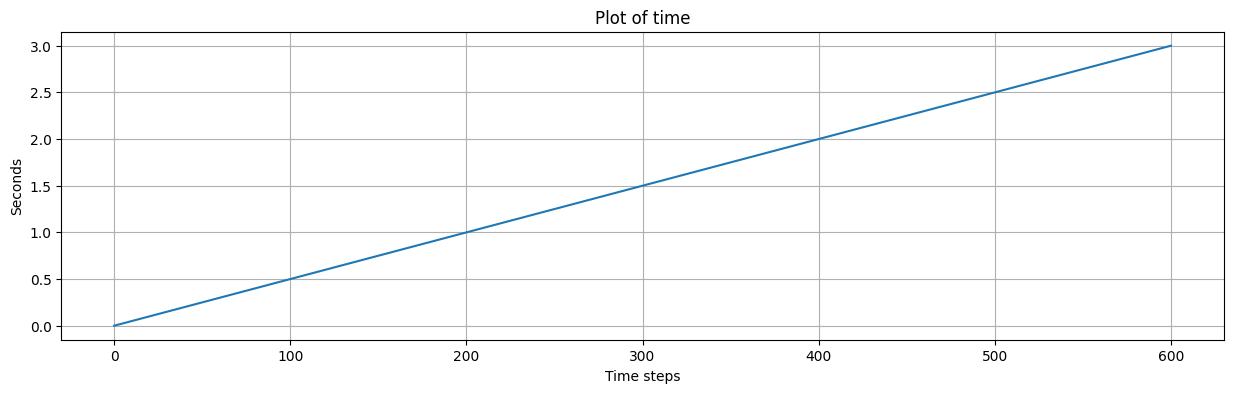

In [ ]:
row1 = df.iloc[0]  # Row 1

plt.figure(figsize=(15, 4))
plt.plot(row1)
plt.xlabel('Time steps')
plt.ylabel('Seconds')
plt.title('Plot of time')
plt.grid(True)
plt.show()

In [ ]:
Z_data.shape

(51, 51)

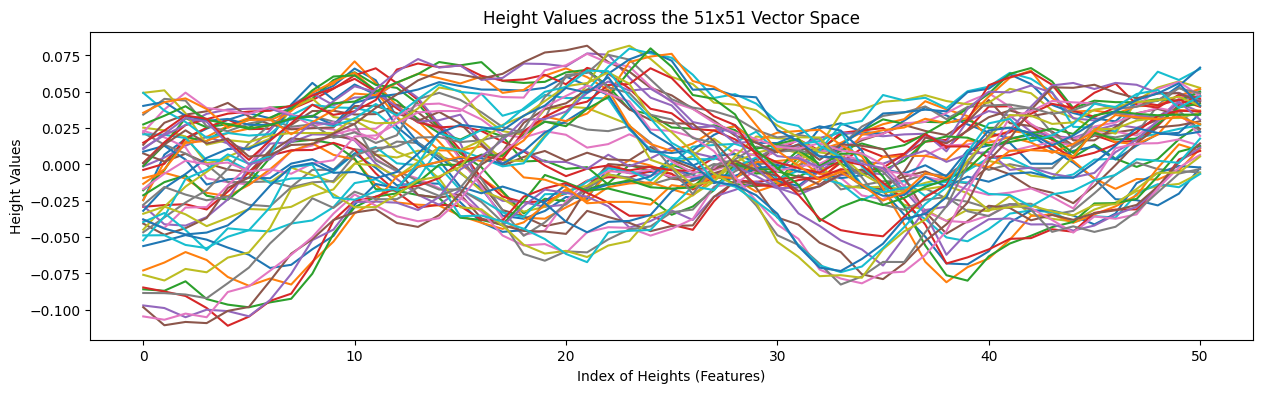

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(Z_data)
plt.xlabel('Index of Heights (Features)')
plt.ylabel('Height Values')
plt.title('Height Values across the 51x51 Vector Space')
plt.show()

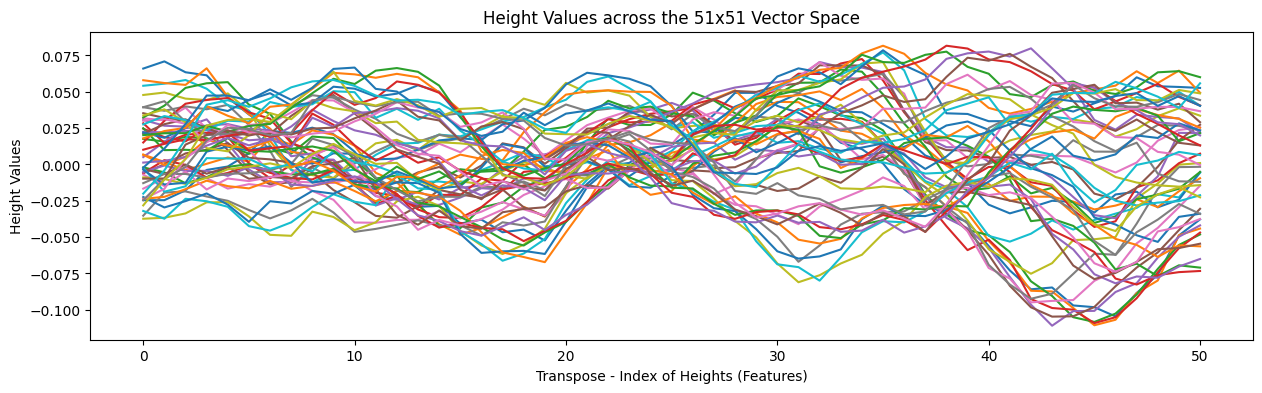

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(Z_data.transpose())
plt.xlabel('Transpose - Index of Heights (Features)')
plt.ylabel('Height Values')
plt.title('Height Values across the 51x51 Vector Space')
plt.show()

# 2-dimensional array (matrix) into a 1-dimensional array

**Loss of Structural Information:**
When you flatten a matrix, you lose the spatial relationships between elements. In a 51x51 matrix, each element has specific row and column indices that indicate its position within the matrix. Flattening removes this positional information.

In [ ]:
Z_data_flattened = Z_data.stack().reset_index(drop=True)

Z_data_flattened.shape

(2601,)

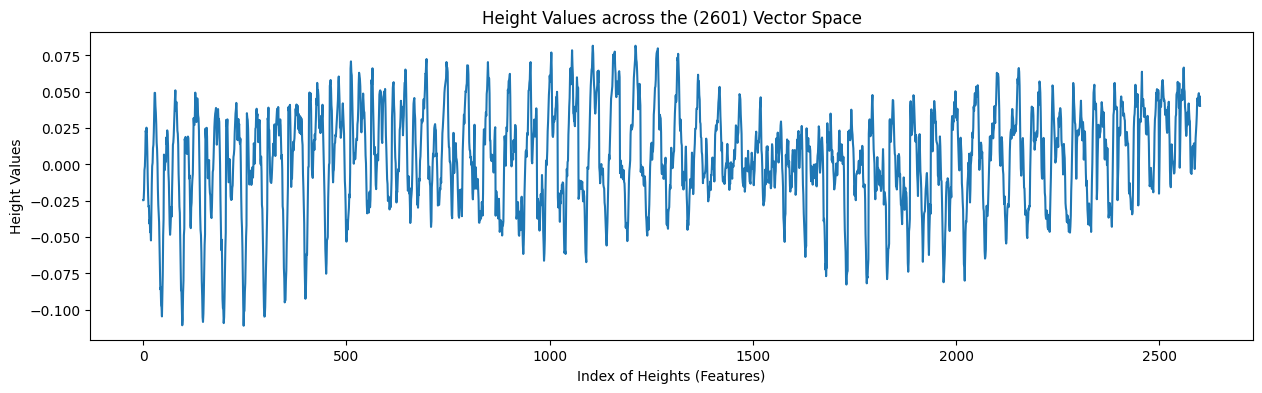

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(Z_data_flattened)
plt.xlabel('Index of Heights (Features)')
plt.ylabel('Height Values')
plt.title('Height Values across the (2601) Vector Space')
plt.show()

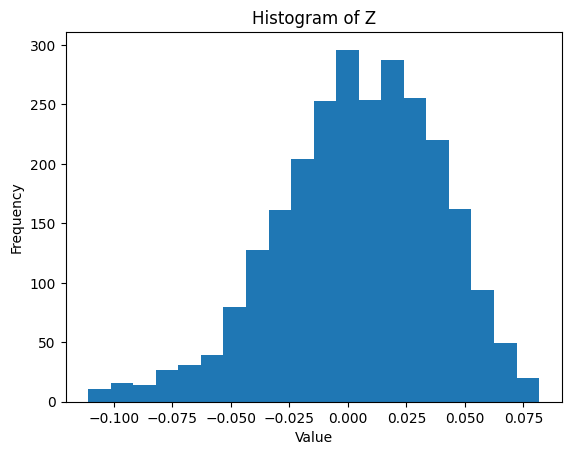

In [ ]:

plt.hist(Z_data_flattened, bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Z')
plt.show()


In [ ]:
Z_data_flattened[:5]

0   -0.024557
1   -0.024557
2   -0.017753
3   -0.003755
4   -0.001402
dtype: float64

In [ ]:
# Make 601 copies of Z_data_array_flat, resulting in a shape of (601, 2601)
Z_data_copied = np.tile(Z_data_flattened, (601, 1))
Z_data_copied.shape

(601, 2601)

In [ ]:
Z_data_copied[:5,:5]

array([[-0.024557 , -0.024557 , -0.017753 , -0.0037546, -0.0014016],
       [-0.024557 , -0.024557 , -0.017753 , -0.0037546, -0.0014016],
       [-0.024557 , -0.024557 , -0.017753 , -0.0037546, -0.0014016],
       [-0.024557 , -0.024557 , -0.017753 , -0.0037546, -0.0014016],
       [-0.024557 , -0.024557 , -0.017753 , -0.0037546, -0.0014016]])

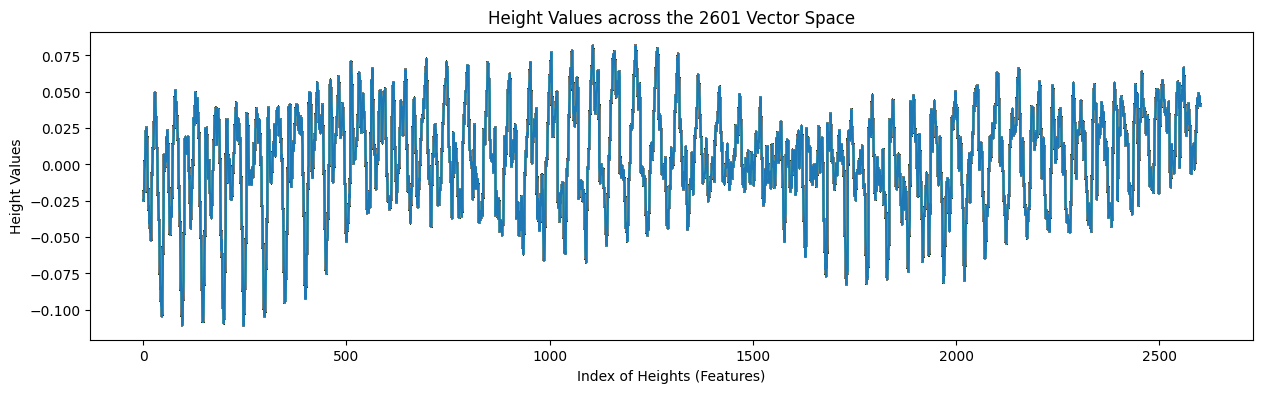

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(Z_data_copied.transpose())
plt.xlabel('Index of Heights (Features)')
plt.ylabel('Height Values')
plt.title('Height Values across the 2601 Vector Space')
plt.show()

In [ ]:
Z_data_copied.shape
t_data.shape

(1, 601)

In [ ]:
# Assuming t_data is a pandas DataFrame or Series object
t_data_array = t_data.to_numpy()

# Reshape the array
t_data_reshaped = np.reshape(t_data_array, (601, 1))
t_data_reshaped.shape

(601, 1)

In [ ]:
type(Z_data_copied)

numpy.ndarray

In [ ]:
result_matrix = np.hstack((Z_data_copied, t_data_reshaped ))
result_matrix.shape

(601, 2602)

In [ ]:
result_matrix[0,:]

array([-0.024557, -0.024557, -0.017753, ...,  0.047031,  0.040345,
        0.      ])

In [ ]:
# Assuming t_data is a pandas DataFrame or Series object
Fsd_data_array = Fsd_data.to_numpy()

# Reshape the array
Fsd_data_reshaped = np.reshape(Fsd_data_array, (601, 1))
Fsd_data_reshaped.shape


(601, 1)

In [ ]:
X = result_matrix
y = Fsd_data_reshaped

print('shape of x is : ',X.shape)
print('shape of y is : ',y.shape)

shape of x is :  (601, 2602)
shape of y is :  (601, 1)


That's the end of the data transformation

# **Models**

Everything beginnings here

https://github.com/bnsreenu/python_for_microscopists/blob/master/141-regression_housing_example.py


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

print('shape of X_train is : ',X_train.shape)
print('shape of X_test is : ',X_test.shape)
print('shape of y_train is : ',y_train.shape)
print('shape of y_test is : ',y_test.shape)

shape of X_train is :  (480, 2602)
shape of X_test is :  (121, 2602)
shape of y_train is :  (480, 1)
shape of y_test is :  (121, 1)


In [ ]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

drop out

PCA: https://towardsdatascience.com/data-preprocessing-and-interpreting-results-the-heart-of-machine-learning-part-2-pca-feature-92f8f6ec8c8

Feature Importance: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/



In [ ]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(512, input_dim=2602, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1332736   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1406721 (5.37 MB)
Trainable params: 1406721 (5.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 1s 38ms/step - loss: 12.6079 - mae: 3.1127 - val_loss: 11.6794 - val_mae: 2.9463
Epoch 2/100
12/1

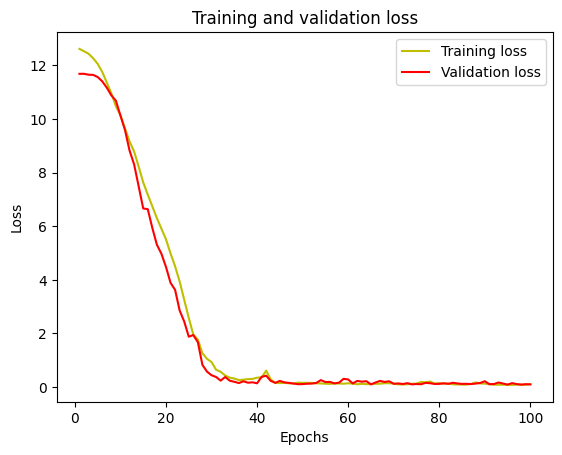

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


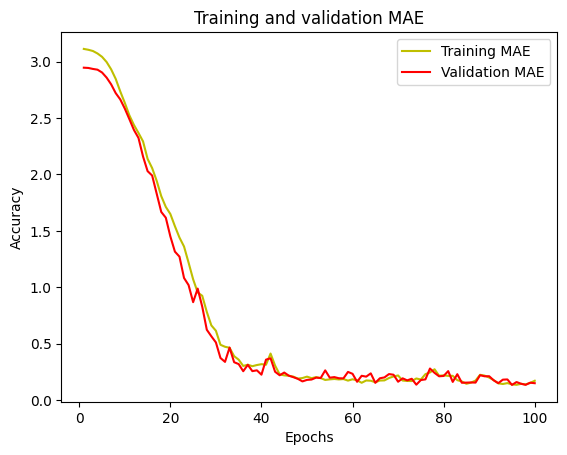

In [ ]:
# acc = history.history['mean_absolute_error']
# val_acc = history.history['val_mean_absolute_error']
# Accessing training MAE
acc = history.history['mae']

# Accessing validation MAE
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

############################################
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
#############################################

1/1 [==============================] - 0s 109ms/step
Predicted values are:  [[ 3.1053462]
 [-2.2595236]
 [ 5.377618 ]
 [-1.031885 ]
 [-1.977926 ]]
Real values are:  [[ 3.2806]
 [-2.4694]
 [ 5.5253]
 [-1.0876]
 [-1.9457]]


In [ ]:
y_test.shape

(121, 1)

4/4 [==============================] - 0s 6ms/step


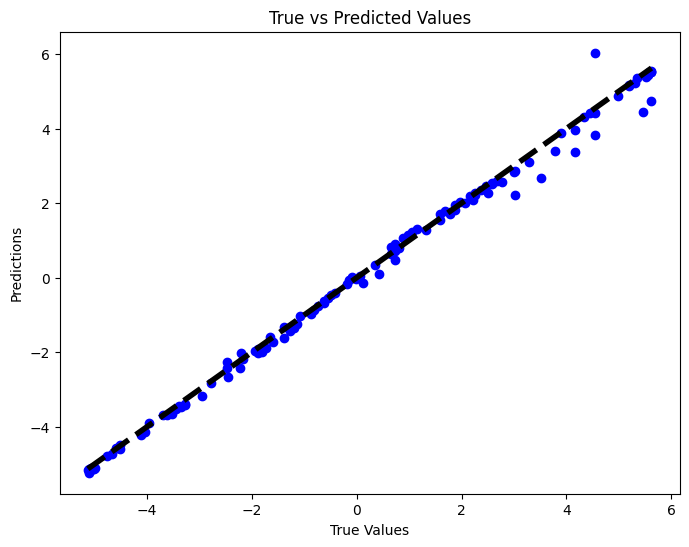

In [ ]:
# Assuming model is your trained model
# Assuming X_test_scaled is your scaled test data
# Assuming y_test is your true test labels

# Predictions on test data
y_pred = model.predict(X_test_scaled)

# Plotting predicted vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# plt.plot([y_test], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


4/4 [==============================] - 0s 5ms/step


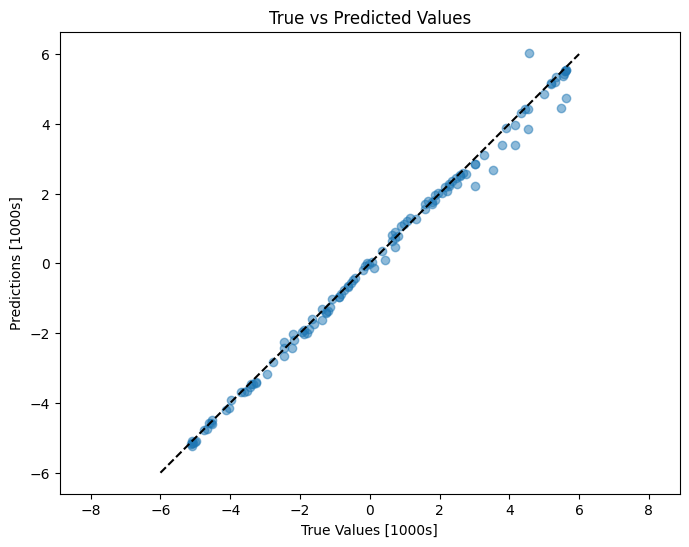

In [ ]:
# After training, predict the values for test set to plot
test_predictions = model.predict(X_test_scaled).flatten()

# Plotting predicted vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([-6, 6], [-6, 6], 'k--')  # Plotting a dashed line for perfect predictions
plt.xlabel('True Values [1000s]')
plt.ylabel('Predictions [1000s]')
plt.title('True vs Predicted Values')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

4/4 [==============================] - 0s 9ms/step


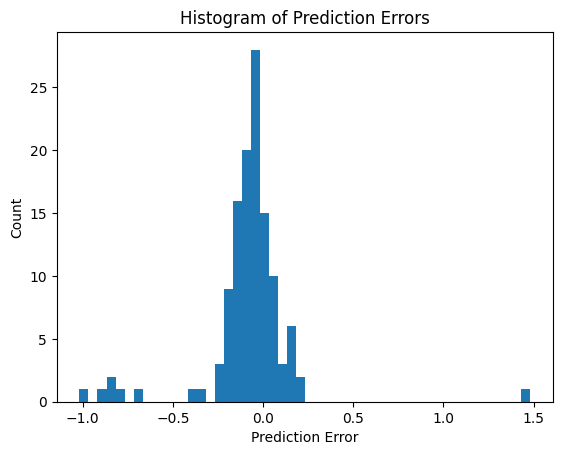

In [ ]:
# After training, predict the values for validation set to calculate the error for plotting
y_pred = model.predict(X_test_scaled)

# Calculate the prediction error
error = y_pred.flatten() - y_test.flatten()

# Plot the histogram of the prediction errors
plt.hist(error, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Histogram of Prediction Errors')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming y_test and y_pred are available from the previous context where model was defined and used
# # If not, they need to be loaded or defined again.

# # Create a figure and a set of subplots
# fig, ax = plt.subplots(figsize=(8, 6))

# # Create a plot similar to the first image which has a 'Rough' and 'Smooth' line
# # Assuming 'Rough' represents the true values and 'Smooth' the predictions
# # We will need a range for the x-axis which represents 't' in the first image
# t = np.linspace(y_test.min(), y_test.max(), len(y_test))

# # Sort the true and predicted values based on the true values to create a smooth line
# sorted_indices = np.argsort(y_test)
# sorted_y_test = y_test[sorted_indices]
# sorted_y_pred = y_pred[sorted_indices]

# # Plot the 'Rough' line (True values)
# ax.plot(t, sorted_y_test, label='True Values', linestyle='-', color='black')

# # Plot the 'Smooth' line (Predicted values)
# ax.plot(t, sorted_y_pred, label='Predictions', linestyle='--', color='grey')

# # Adding labels and title
# ax.set_xlabel('t')
# ax.set_ylabel('F(t)')
# ax.set_title('Output')

# # Show legend
# ax.legend()

# # Show the plot
# plt.show()


In [ ]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 9ms/step - loss: 0.0673 - mae: 0.1434
Mean squared error from neural net:  0.06734523177146912
Mean absolute error from neural net:  0.14338418841362


In [ ]:
######################################################################
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


Mean squared error from linear regression:  10.245671273952574
Mean absolute error from linear regression:  2.717032817932569


In [ ]:
############################################################
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)


Mean squared error using decision tree:  0.02365618208255371
Mean absolute error using decision tree:  0.12184896694214872


In [ ]:
##############################################
#Random forest
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)


<ipython-input-47-7ccd60627ad4>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train)


Mean squared error using Random Forest:  0.010493904736464188
Mean absolute error Using Random Forest:  0.06665857079889792


I think something is wrong

In [ ]:
#Feature ranking...
# feature_list = list(X.columns)
feature_list = list(range(1, 2603))
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)


# Filter the feature importances greater than 0
feature_imp_greater_than_zero = feature_imp[feature_imp > 0]

# Print feature importance
print(feature_imp_greater_than_zero)

2602    1.0
dtype: float64


# I think something is wrong

https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/


https://towardsdatascience.com/data-preprocessing-and-interpreting-results-the-heart-of-machine-learning-part-2-pca-feature-92f8f6ec8c8

In [ ]:
##############################################
#xgboost.
#Increase number of tress and see the effect
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Instantiating an XGBoost regressor object
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, alpha=10)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=1000, learning_rate=0.0001, max_depth=1, alpha=10)

# Fitting the regressor to the training set
xg_reg.fit(X_train_scaled, y_train)

# Predicting on the test set
preds = xg_reg.predict(X_test)

# Calculate the mean squared error and mean absolute error
mse_XGB = mean_squared_error(y_test, preds)
mae_XGB = mean_absolute_error(y_test, preds)

# Print the errors
print('Mean squared error using XGBoost: ', mse_XGB)
print('Mean absolute error Using XGBoost: ', mae_XGB)


Mean squared error using XGBoost:  10.181191765484597
Mean absolute error Using XGBoost:  2.6989707898965274


In [ ]:
print('Mean squared error from Neural Net:         ', mse_neural)
print('Mean absolute error from Neural Net:        ', mae_neural)
print('-----------------------------------------------------------------')
print('Mean squared error from Linear Regression: ', mse_lr)
print('Mean absolute error from Linear Regression: ', mae_lr)
print('-----------------------------------------------------------------')
print('Mean squared error using Decision Tree:     ', mse_dt)
print('Mean absolute error using Decision Tree:    ', mae_dt)
print('-----------------------------------------------------------------')
print('Mean squared error using Random Forest:    *', mse_RF)
print('Mean absolute error Using Random Forest:   *', mae_RF)
print('-----------------------------------------------------------------')
print('Mean squared error using XGBoost:          ', mse_XGB)
print('Mean absolute error Using XGBoost:          ', mae_XGB)


Mean squared error from Neural Net:          0.13788257539272308
Mean absolute error from Neural Net:         0.20720694959163666
-----------------------------------------------------------------
Mean squared error from Linear Regression:  10.245671273952574
Mean absolute error from Linear Regression:  2.717032817932569
-----------------------------------------------------------------
Mean squared error using Decision Tree:      0.02365618208255371
Mean absolute error using Decision Tree:     0.12184896694214872
-----------------------------------------------------------------
Mean squared error using Random Forest:    * 0.010493904736464188
Mean absolute error Using Random Forest:   * 0.06665857079889792
-----------------------------------------------------------------
Mean squared error using XGBoost:           29.847210160790066
Mean absolute error Using XGBoost:           4.704916680143241


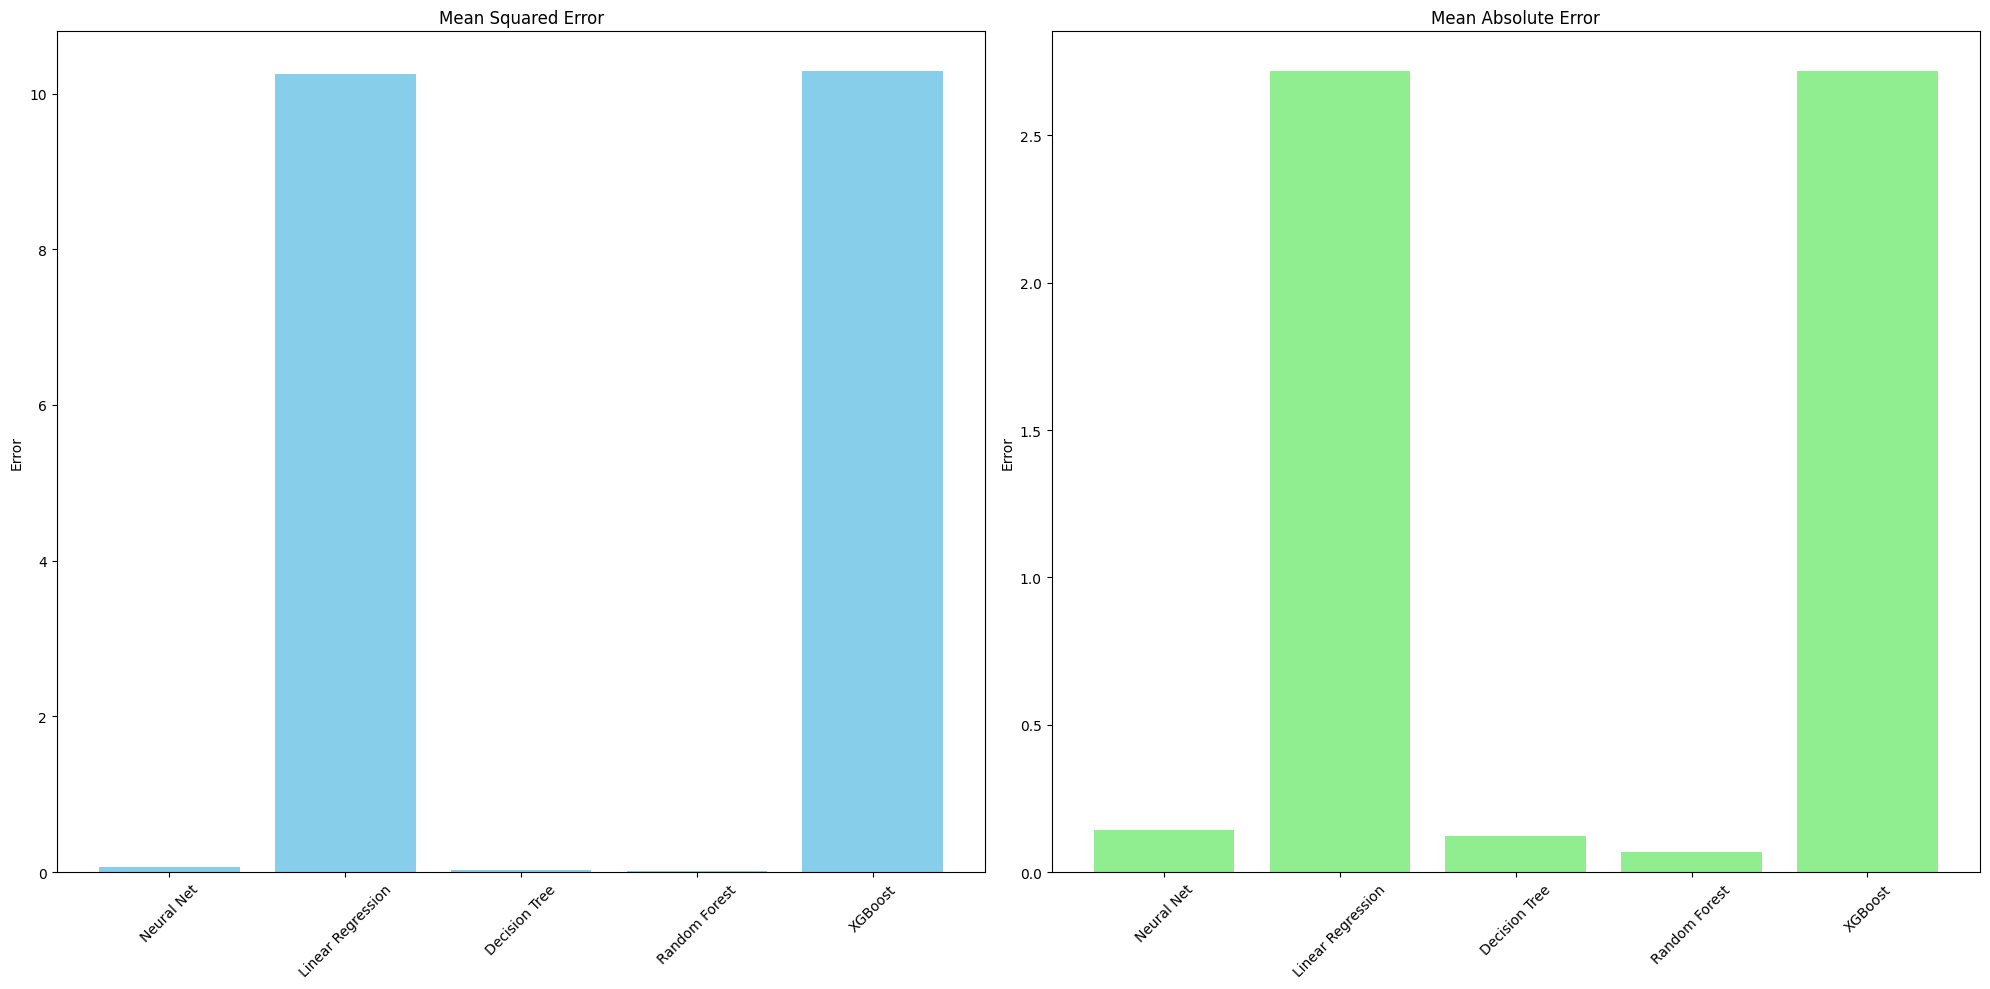

In [ ]:
import matplotlib.pyplot as plt

# Define the data
models = ['Neural Net', 'Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mse_values = [mse_neural, mse_lr, mse_dt, mse_RF, mse_XGB]
mae_values = [mae_neural, mae_lr, mae_dt, mae_RF, mae_XGB]

# Create bar plots for Mean Squared Error
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error')
plt.ylabel('Error')
plt.xticks(rotation=45)

# Create bar plots for Mean Absolute Error
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color='lightgreen')
plt.title('Mean Absolute Error')
plt.ylabel('Error')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


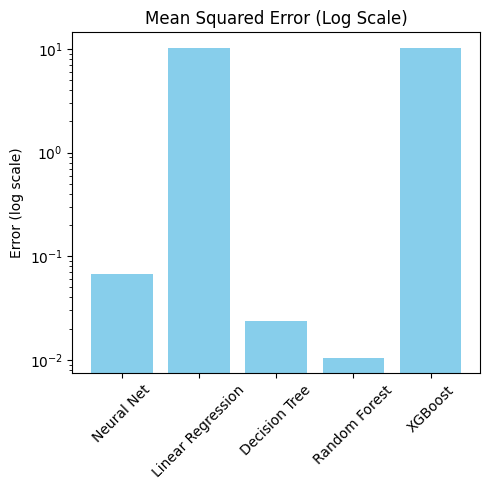

In [ ]:
import matplotlib.pyplot as plt

# Create bar plots for Mean Squared Error on a log scale
plt.figure(figsize=(5, 5))
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (Log Scale)')
plt.ylabel('Error (log scale)')
plt.xticks(rotation=45)
plt.yscale('log')  # Set the y-axis to log scale

plt.tight_layout()
plt.show()


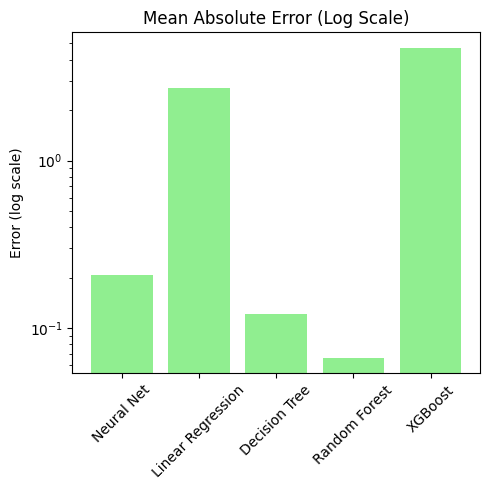

In [ ]:
import matplotlib.pyplot as plt

# Create bar plots for Mean Absolute Error on a log scale
plt.figure(figsize=(5, 5))
plt.bar(models, mae_values, color='lightgreen')
plt.title('Mean Absolute Error (Log Scale)')
plt.ylabel('Error (log scale)')
plt.xticks(rotation=45)
plt.yscale('log')  # Set the y-axis to log scale

plt.tight_layout()
plt.show()
